# Library

In [ ]:
# Unzipping
import zipfile
import os

zip = '/content/archive.zip'  # Replace with the actual filename
des = '/content'  # Destination folder

with zipfile.ZipFile(zip, 'r') as zip_ref:
    zip_ref.extractall(des)

print("Unzipping complete.")

Unzipping complete.


In [ ]:
# importing necessary libraries

from PIL import Image
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import shutil
import pathlib
import itertools

import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print('imported')

imported


# Data EDA, Feature Engineering and Labelling

In [ ]:
# defining the base path of unzipped dataset
# using 331*331 size of images in dataset

base_path = '/content/xkt857dsxk-1/331/331'

In [ ]:
# identifying the lumber spine deformity categories(class names). i.e. folders present in dataset

os.listdir(base_path)

['Spond', 'Scol', 'Normal']

In [ ]:
# List to store image metadata
metadata = []

# Define the class names (subfolders)
classes = ['Spond', 'Scol', 'Normal']
image_counts = {}

# Loop through the class folders ['Spond', 'Scol', 'Normal']
for class_name in classes:
    class_folder_path = os.path.join(base_path, class_name)

    # Check if the folder exists and process its images
    if os.path.exists(class_folder_path):
        image_files = [f for f in os.listdir(class_folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

        # Count the number of images in the class
        image_counts[class_name] = len(image_files)

        # Data was not labelled so Collecting the metadata from images
        for image_file in image_files:
            image_path = os.path.join(class_folder_path, image_file)
            try:
                img = Image.open(image_path)
                metadata.append({
                    'Filename': image_file,
                    'Class': class_name,
                    'Format': img.format,
                    'Size': img.size,
                    'Mode': img.mode,
                    'Width': img.width,
                    'Height': img.height
                })
            except Exception as e:
                print(f"Error opening {image_file}: {e}")

In [ ]:
# Creating metadata dataframe
metadata_df = pd.DataFrame(metadata)

# getting head of df
metadata_df.head()

,Filename,Class,Format,Size,Mode,Width,Height
0,"N26,S,61,M_1003_2.jpg",Spond,JPEG,"(331, 331)",RGB,331,331
1,"N42,S,59,M_1016_6.jpg",Spond,JPEG,"(331, 331)",RGB,331,331
2,"N27, Olisthesis L4-5, M, 61 Yrs.jpg",Spond,JPEG,"(331, 331)",RGB,331,331
3,"N18,S,72,M_1002_3.jpg",Spond,JPEG,"(331, 331)",RGB,331,331
4,"N3,S,48,F_1001_0.jpg",Spond,JPEG,"(331, 331)",RGB,331,331


In [ ]:
image_counts

{'Spond': 78, 'Scol': 185, 'Normal': 71}

In [ ]:

# Create a DataFrame for image counts per class
# metadata_df['Class'].value_counts()
df_counts = pd.DataFrame(list(image_counts.items()), columns=['Class', 'ImageCount'])

# Display the same
df_counts

,Class,ImageCount
0,Spond,78
1,Scol,185
2,Normal,71


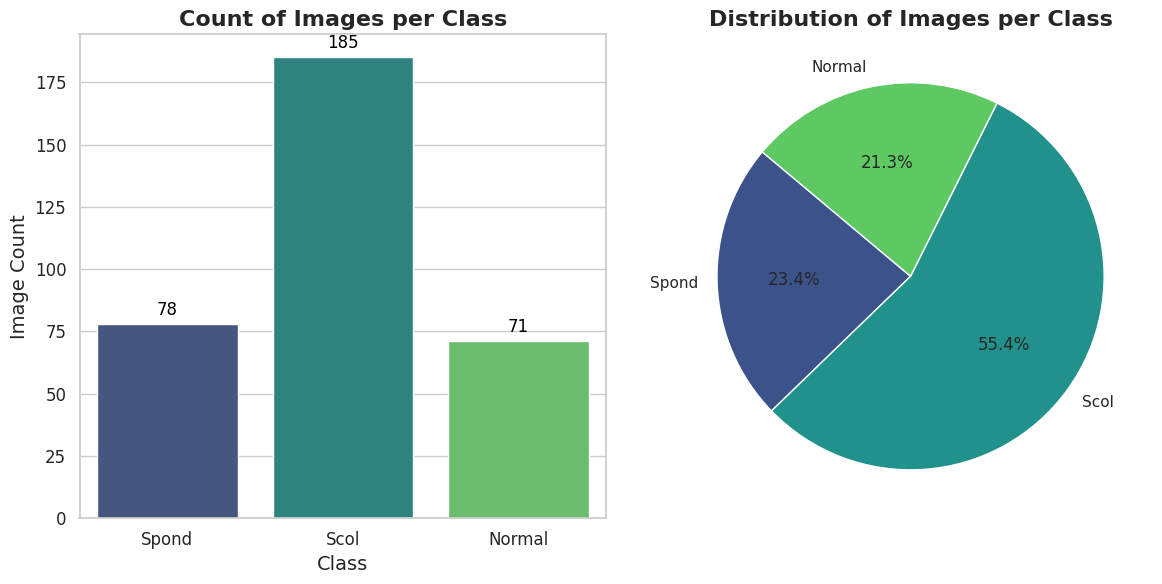

In [ ]:
sns.set(style="whitegrid") # Eliminate this to keep default sns background while plot

# Create a single plot figure
plt.figure(figsize=(12, 6))

# Plot 1,2,1: Barplot of Image Counts per Class
plt.subplot(1, 2, 1)
barplot = sns.barplot(data=df_counts, x='Class', y='ImageCount', palette="viridis")

# Add value labels on top of the bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():,.0f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     fontsize=12, color='black',
                     xytext=(0, 10), textcoords='offset points')

plt.title('Count of Images per Class', fontsize=16, weight='bold')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Image Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot 1,2,2: Pie Chart of Image Distribution per Class
plt.subplot(1, 2, 2)
plt.pie(df_counts['ImageCount'], labels=df_counts['Class'], autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("viridis", n_colors=len(df_counts)))
plt.title('Distribution of Images per Class', fontsize=16, weight='bold')

# Add a shadow effect to the pie chart
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.tight_layout()

# Show the plot
plt.show()


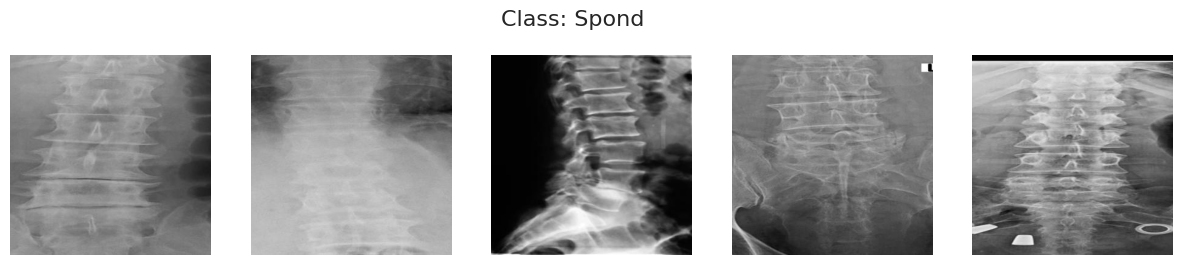

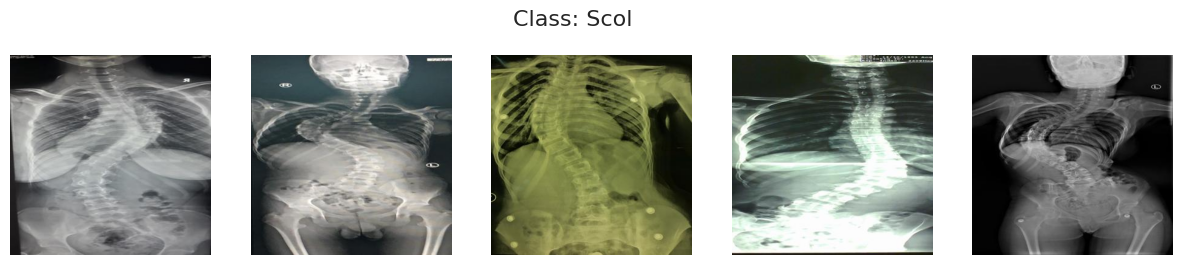

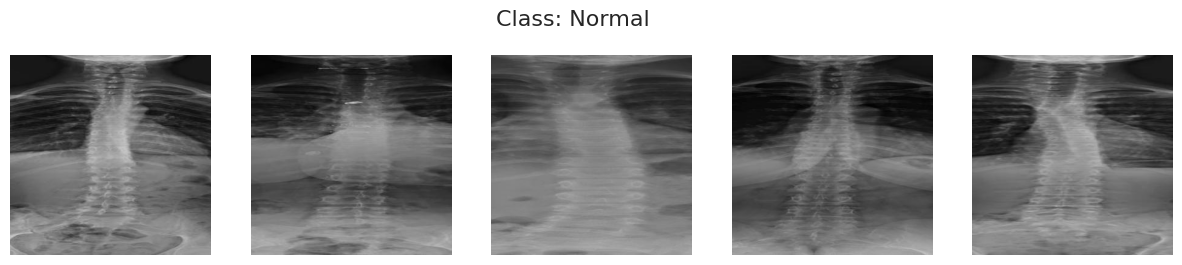

In [ ]:
# Getting 1st 5 images from each class

for class_name in classes:
    folder_path = os.path.join(base_path, class_name)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:5]

    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Class: {class_name}", fontsize=16)

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path)

        plt.subplot(1, 5, i+1)
        plt.imshow(image, cmap='gray') #converting image from rgb to gray scale
        plt.axis('off')

    plt.show()

In [ ]:
# labeling images based on in which flder the image is present
#'Normal': 1
#'Scol': 2
#'Spond': 3

image_data = []

folders = {'Normal': 1, 'Scol': 2, 'Spond': 3}

for folder_name, label in folders.items():
    folder_path = os.path.join(base_path, folder_name)

    if os.path.exists(folder_path):
        image_files = os.listdir(folder_path)

        for image_file in image_files:
            image_data.append((os.path.join(folder_path, image_file), label))
    else:
        print(f"Folder {folder_path} not found.")

data= pd.DataFrame(image_data, columns=['image_path', 'label'])

In [ ]:
data

,image_path,label
0,"/content/xkt857dsxk-1/331/331/Normal/N27,N,F,2...",1
1,"/content/xkt857dsxk-1/331/331/Normal/N23,N,F,2...",1
2,"/content/xkt857dsxk-1/331/331/Normal/N66,N,6,F...",1
3,"/content/xkt857dsxk-1/331/331/Normal/N52,N,47,...",1
4,"/content/xkt857dsxk-1/331/331/Normal/N37,N,M,1...",1
...,...,...
333,"/content/xkt857dsxk-1/331/331/Spond/N13,S,51,M...",3
334,"/content/xkt857dsxk-1/331/331/Spond/N40,S,72,F...",3
335,"/content/xkt857dsxk-1/331/331/Spond/N4,S,59,F_...",3
336,"/content/xkt857dsxk-1/331/331/Spond/N34,S,70,M...",3


In [ ]:
data.info() # getting datatype for each column, note we have to convert the label to str since its int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  338 non-null    object
 1   label       338 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [ ]:
data.shape

(338, 2)

In [ ]:
data.isnull().sum()

,0
image_path,0
label,0


In [ ]:
data.duplicated().sum() # checking for duplicate images

np.int64(0)

In [ ]:
data["label"].unique() # checking labelling is done correctly

array([1, 2, 3])

In [ ]:
data['label'].value_counts() # getting images counts for each label

#this made me worry so performed image augmentation on training set in next section

# Image augmentation is a technique used in machine learning to artificially
# expand a dataset by creating variations of existing images. This is done by
# applying geometric transformations, color space alterations, or other image
# manipulations to the original images. The goal is to increase the diversity
# of the training data, making models more robust and generalizable, especially
# when real-world data is limited.

,count
label,
2,188
3,79
1,71


In [ ]:
#Split the original dataset (data) into a training set (train_data_new) and a temporary set (temp_data_new), which will later be divided into validation and test sets.
# train_data_necw - 80%
# valid_data_new - 10%
# test_data_new - 10%

train_data_new, temp_data_new = train_test_split(
    data,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=data['label']   #Ensures the class distribution in the label column is preserved in both subsets.
)

valid_data_new, test_data_new = train_test_split(
    temp_data_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_data_new['label']
)

In [ ]:
train_data_new.shape

(270, 2)

In [ ]:
temp_data_new.shape

(68, 2)

In [ ]:
valid_data_new.shape

(34, 2)

In [ ]:
test_data_new.shape

(34, 2)

In [ ]:
data['label'] = data['label'].astype(str)

# Data augmentation

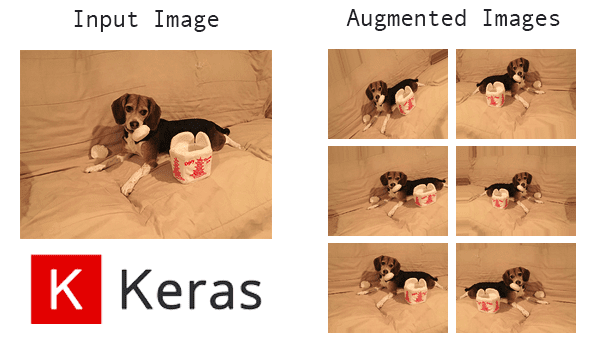

## Random Sampling the data to prevent model biased toward tje one specific class

In [ ]:
from imblearn.over_sampling import RandomOverSampler


#Reshaped to 2D (.reshape(-1, 1)) because RandomOverSampler requires the input to have at least 2 dimensions.
X = train_data_new['image_path'].values.reshape(-1, 1) # from [1,2,3] to [[1],[2],[3]]

y = train_data_new['label'].values

#Duplicates samples from the minority classes until all classes have the same number of instances as the majority class.
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

balanced_train_data = pd.DataFrame({
    'image_path': X_resampled.flatten(), # from [[1],[2],[3]] to [1,2,3]
    'label': y_resampled
})

print("Class distribution after oversampling:")
print(balanced_train_data['label'].value_counts())

Class distribution after oversampling:
label
3    150
2    150
1    150
Name: count, dtype: int64


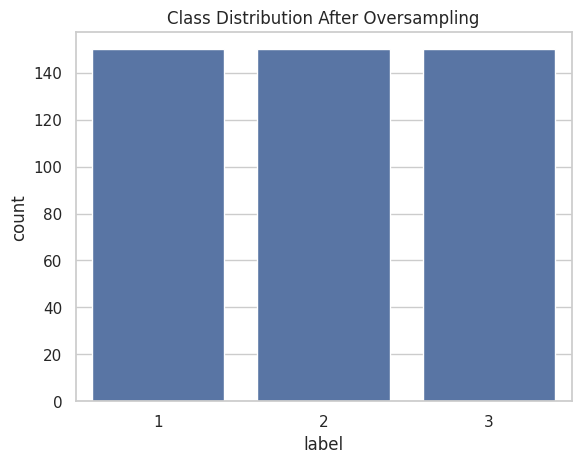

In [ ]:
sns.countplot(data=balanced_train_data, x='label')
plt.title("Class Distribution After Oversampling")
plt.show()


In [ ]:
balanced_train_data.shape

(450, 2)

In [ ]:
balanced_train_data['label'] = balanced_train_data['label'].astype(str) # augmented train set
valid_data_new['label'] = valid_data_new['label'].astype(str) # valid set
test_data_new['label'] = test_data_new['label'].astype(str) # test set

## Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Configuration
batch_size = 16
img_size = (128, 128)  # Resize images to match CNN input
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# ImageDataGenerator with augmentation for training
tr_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,           # Random rotation (±20 degrees)
    width_shift_range=0.1,       # Horizontal shift (10% of width)
    height_shift_range=0.1,      # Vertical shift (10% of height)
    shear_range=0.1,             # Shearing transformation
    zoom_range=0.2,              # Zoom in/out
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill in new pixels after rotation/shift
)

# ImageDataGenerator for validation and testing (no augmentation)
ts_gen = ImageDataGenerator(rescale=1./255)

# Training generator with augmentation
train_gen_new = tr_gen.flow_from_dataframe(
    balanced_train_data,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

# Validation generator (no augmentation)
valid_gen_new = ts_gen.flow_from_dataframe(
    valid_data_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

# Test generator (no augmentation and no shuffling)
test_gen_new = ts_gen.flow_from_dataframe(
    test_data_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)


Found 450 validated image filenames belonging to 3 classes.
Found 34 validated image filenames belonging to 3 classes.
Found 34 validated image filenames belonging to 3 classes.


In [ ]:
train_gen_new

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
def load_images(image_paths, target_size=(128, 128)):
    images = []
    for path in image_paths:
        img = tf.keras.preprocessing.image.load_img(base_path, target_size=target_size)  # Resize image
        img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize pixel values
        images.append(img_array)
    return np.array(images)



In [ ]:
# Load validation and test data from the original DataFrames
X_valid = valid_data_new['image_path'].values  # Access image paths directly
y_valid = valid_data_new['label'].values      # Access labels directly

X_test = test_data_new['image_path'].values
y_test = test_data_new['label'].values


In [ ]:
import tensorflow as tf
import numpy as np
import os

# Function to load and preprocess images
def load_images(image_paths, target_size=(128, 128)):
    images = []
    for path in image_paths:
        if os.path.isfile(path):  # Ensure it's a valid file
            img = tf.keras.preprocessing.image.load_img(path, target_size=target_size)  # Resize image
            img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize pixel values
            images.append(img_array)
        else:
            print(f"Skipping directory or invalid file path: {path}")
    return np.array(images)

# Load and preprocess the resampled training data
X_train_processed = load_images(train_data_new['image_path'].values)
y_train_processed = train_data_new['label'].values

# Load and preprocess the validation data (without oversampling)
X_valid_processed = load_images(valid_data_new['image_path'].values)
y_valid_processed = valid_data_new['label'].values

# Load and preprocess the test data (without oversampling)
X_test_processed = load_images(test_data_new['image_path'].values)
y_test_processed = test_data_new['label'].values



In [ ]:
print(y_train_processed[:5])  # Print the first 5 labels to inspect


[3 2 2 3 2]


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the labels
y_train_processed = label_encoder.fit_transform(y_train_processed)
y_valid_processed = label_encoder.transform(y_valid_processed)
y_test_processed = label_encoder.transform(y_test_processed)  # If needed for testing

# Check the mapping of labels
print("Classes:", label_encoder.classes_)


Classes: [1 2 3]


# CNN Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # Input shape adjusted to (128, 128, 3)
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Adjust '3' to match your number of classes
])

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',  # Or 'categorical_crossentropy' if using one-hot encoding
                  metrics=['accuracy'])

# Check model summary (optional)
cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,707 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# num_classes = len(label_encoder.classes_)  # Automatically determine number of classes
# cnn_model.layers[-1] = Dense(num_classes, activation='softmax')


In [ ]:
cnn_model.fit(
    X_train_processed, y_train_processed,  # Training data (image arrays, labels)
    validation_data=(X_valid_processed, y_valid_processed),  # Validation data
    epochs=30,  # Number of training epochs
    batch_size=32,  # Batch size
    verbose=1  # Display training progress
)


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 423ms/step - accuracy: 0.4445 - loss: 3.0125 - val_accuracy: 0.5588 - val_loss: 0.9300
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5561 - loss: 0.9392 - val_accuracy: 0.5588 - val_loss: 0.7825
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6158 - loss: 0.7317 - val_accuracy: 0.6765 - val_loss: 0.6498
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7186 - loss: 0.6070 - val_accuracy: 0.7353 - val_loss: 0.5936
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8252 - loss: 0.4416 - val_accuracy: 0.8824 - val_loss: 0.4326
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8842 - loss: 0.3232 - val_accuracy: 0.8529 - val_loss: 0.6075
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9151 - loss: 0.2836 - val_accuracy: 0.8529 - val_loss: 0.4307
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9059 - loss: 0.2102 - val_accuracy: 0.9118 - val_loss: 0.5488

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


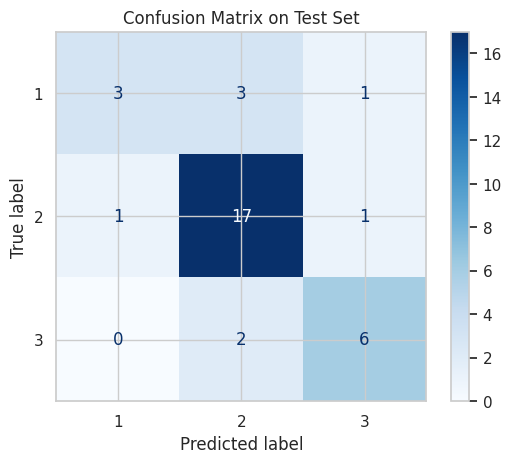

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Predict on the test set using the generator
y_pred_probs = cnn_model.predict(test_gen_new, steps=int(np.ceil(test_gen_new.samples / batch_size)))

# Step 2: Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Step 3: Generate confusion matrix
# Use the correct number of classes in the test set (which matches the length of `y_pred`)
cm = confusion_matrix(test_gen_new.classes[:len(y_pred)], y_pred)

# Step 4: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_gen_new.class_indices)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix on Test Set")
plt.show()

In [ ]:
# Step 1: Load and preprocess the validation data
X_valid_processed = load_images(valid_data_new['image_path'].values)  # Ensure the images are resized and normalized
X_test_processed = load_images(test_data_new['image_path'].values)

# Step 2: Evaluate the model with the processed images
val_loss, val_accuracy = cnn_model.evaluate(X_valid_processed, y_valid_processed)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9700 - loss: 0.6149
Validation Loss: 0.6024525165557861
Validation Accuracy: 0.970588207244873


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(X_test_processed, y_test_processed)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7598 - loss: 1.0782
Test Loss: 1.056187629699707
Test Accuracy: 0.7647058963775635


In [ ]:
print("Unique labels:", np.unique(y_train_processed))  # Should print [0 1 2]


Unique labels: [0 1 2]


# MobileNet

In [ ]:
# ✅ MobileNetV2 Version Using ImageDataGenerator

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers


In [ ]:
# === Step 1: Load and label image paths ===
base_path = '/content/xkt857dsxk-1/331/331'
folders = {'Normal': '0', 'Scol': '1', 'Spond': '2'}

image_data = []
for folder_name, label in folders.items():
    folder_path = os.path.join(base_path, folder_name)
    if os.path.exists(folder_path):
        for file in os.listdir(folder_path):
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_data.append((os.path.join(folder_path, file), label))

data = pd.DataFrame(image_data, columns=['image_path', 'label'])
data['label'] = data['label'].astype(str)

In [ ]:
# === Step 2: Train/Val/Test split ===
train_data, temp_data = train_test_split(data, test_size=0.2, stratify=data['label'], random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['label'], random_state=42)

In [ ]:
# === Step 3: Oversample training set ===
X = train_data['image_path'].values.reshape(-1, 1)
y = train_data['label'].values
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
train_balanced = pd.DataFrame({'image_path': X_resampled.flatten(), 'label': y_resampled})


In [ ]:
# === Step 4: Image generators ===
batch_size = 16
img_size = (224, 224)

datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen_val_test = ImageDataGenerator(rescale=1./255)

train_gen = datagen_train.flow_from_dataframe(
    train_balanced,
    x_col='image_path', y_col='label',
    target_size=img_size, color_mode='rgb',
    class_mode='categorical', batch_size=batch_size, shuffle=True
)
valid_gen = datagen_val_test.flow_from_dataframe(
    valid_data,
    x_col='image_path', y_col='label',
    target_size=img_size, color_mode='rgb',
    class_mode='categorical', batch_size=batch_size, shuffle=False
)
test_gen = datagen_val_test.flow_from_dataframe(
    test_data,
    x_col='image_path', y_col='label',
    target_size=img_size, color_mode='rgb',
    class_mode='categorical', batch_size=batch_size, shuffle=False
)

Found 450 validated image filenames belonging to 3 classes.
Found 34 validated image filenames belonging to 3 classes.
Found 34 validated image filenames belonging to 3 classes.


In [ ]:
# === Step 5: Define MobileNetV2 Model ===
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False,i weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_15[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# === Step 6: Train model ===
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, verbose=1)

model.fit(train_gen, validation_data=valid_gen, epochs=30, callbacks=[early_stop, reduce_lr], verbose=1)


Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 482ms/step - accuracy: 0.2933 - loss: 3.7354 - val_accuracy: 0.5294 - val_loss: 3.1699 - learning_rate: 1.0000e-04
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - accuracy: 0.5879 - loss: 3.1244 - val_accuracy: 0.6765 - val_loss: 2.8771 - learning_rate: 1.0000e-04
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - accuracy: 0.6506 - loss: 2.9400 - val_accuracy: 0.7647 - val_loss: 2.6786 - learning_rate: 1.0000e-04
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.7482 - loss: 2.7194 - val_accuracy: 0.7941 - val_loss: 2.5701 - learning_rate: 1.0000e-04
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - accuracy: 0.7835 - loss: 2.5489 - val_accuracy: 0.8529 - val_loss: 2.4476 - learning_rate: 1.0000e-04
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.8262 - loss: 2.4624 - val_accuracy: 0.8235 - val_loss: 2.3363 - learning_rate: 1.0000e-04
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - accuracy

In [ ]:
# === Step 7: Evaluate model ===
test_loss, test_acc = model.evaluate(test_gen, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8529


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


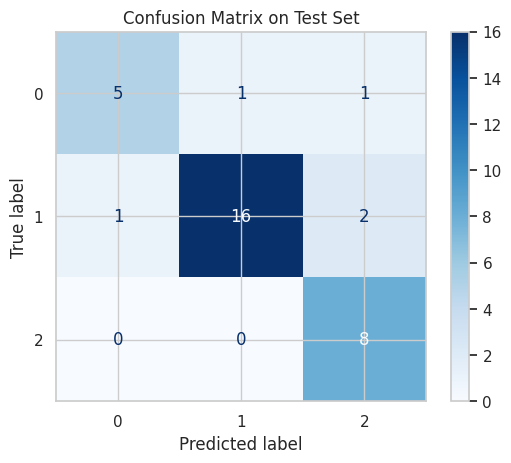

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.84      0.89        19
           2       0.73      1.00      0.84         8

    accuracy                           0.85        34
   macro avg       0.83      0.85      0.83        34
weighted avg       0.87      0.85      0.85        34



In [ ]:
# === Step 8: Confusion matrix & report ===
y_true = test_gen.classes
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
labels = list(test_gen.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot(cmap='Blues')
plt.title("Confusion Matrix on Test Set")
plt.show()

print(classification_report(y_true, y_pred, target_names=labels))

In [ ]:
model.save("mobilenetv2_final.keras")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("mobilenetv2_final.keras")

# Mobile net testing

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# === Load your saved model ===
model = load_model("mobilenetv2_final.keras")
# === Define class mapping ===
class_mapping = {'0': 'Normal', '1': 'Scol', '2': 'Spond'}

# === Load and preprocess the image ===
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))     # Resize to match training
    img_array = img_to_array(img) / 255.0                   # Normalize
    img_array = np.expand_dims(img_array, axis=0)           # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])

    # Reverse lookup from index to class name
    label = class_mapping[str(predicted_class_index)]
    confidence = predictions[0][predicted_class_index]

    print(f"Prediction: {label} ({confidence:.2f})")

# === Example usage ===
predict_image("/content/xkt857dsxk-1/224/224/Normal/N1,N,40,M_1_0.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Prediction: Normal (0.97)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mv /content/xkt857dsxk-1 /content/drive/MyDrive/Lumber_Spine

In [ ]:
!mv "/content/mobilenetv2_final.keras" "/content/drive/MyDrive/Lumber_Spine"